In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
plt.rcParams["figure.figsize"] = (14,4)

In [22]:
data = pd.read_csv("../data/base_limpia.csv", parse_dates=["tiempo", "fecha pedido", "fecha liq"])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301394 entries, 0 to 301393
Data columns (total 22 columns):
Unnamed: 0         301394 non-null int64
tiempo             301394 non-null datetime64[ns]
nro factura        301394 non-null int64
cliente            301394 non-null int64
categoria          301394 non-null object
tipo negocio       301394 non-null object
localidad          301394 non-null object
direccion          301394 non-null object
plaza/campaña      301394 non-null object
producto           301394 non-null int64
nro pedido         301394 non-null int64
fecha pedido       301394 non-null datetime64[ns]
u pedidas          301394 non-null int64
kg pedidos         301394 non-null float64
fecha liq          301394 non-null datetime64[ns]
u entregadas       301394 non-null int64
kg entregados      301394 non-null float64
importe bruto      301394 non-null float64
importe factura    301394 non-null float64
sucursal           301394 non-null object
longitud           289771 no

In [24]:
data = data.drop(columns=["Unnamed: 0", "nro factura"])

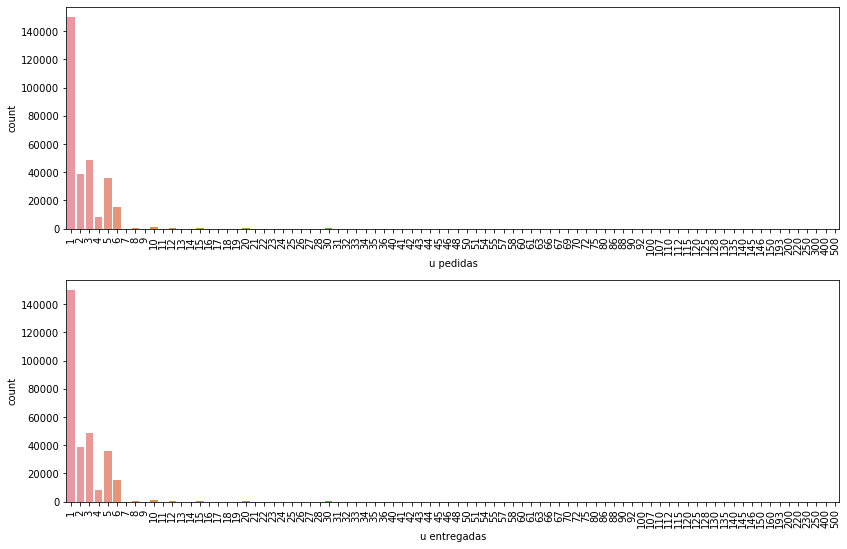

In [139]:
f, ax = plt.subplots(2, 1, figsize=(12, 8))
f.tight_layout(pad=3.0)
sns.countplot(x="u pedidas", data=data, ax=ax[0])
ax[0].tick_params("x", labelrotation=90)
sns.countplot(x="u entregadas", data=data, ax=ax[1])
ax[1].tick_params("x", labelrotation=90);

In [106]:
(data["u entregadas"] != data["u pedidas"]).sum()

126

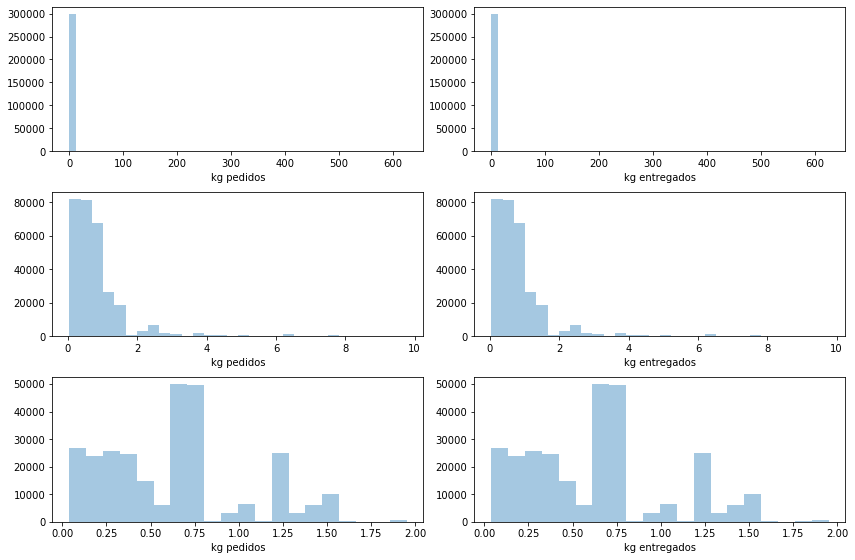

In [123]:
f, ax = plt.subplots(3, 2, figsize=(12,8))
f.tight_layout(pad=2.0)
sns.distplot(data["kg pedidos"], kde=False, ax=ax[0,0])
ax[1,0] = sns.distplot(data.loc[data["kg pedidos"] < 10, "kg pedidos"], bins=30, kde=False, ax=ax[1,0])
ax[2,0] = sns.distplot(data.loc[data["kg pedidos"] < 2, "kg pedidos"], bins=20, kde=False, ax=ax[2,0])
ax[0,1] = sns.distplot(data["kg entregados"], kde=False, ax=ax[0,1])
ax[1,1] = sns.distplot(data.loc[data["kg entregados"] < 10, "kg entregados"], bins=30, kde=False, ax=ax[1,1])
ax[2,1] = sns.distplot(data.loc[data["kg entregados"] < 2, "kg entregados"], bins=20, kde=False, ax=ax[2,1])

In [118]:
(data["kg entregados"] != data["kg pedidos"]).sum()

126

In [221]:
clientes = data[["cliente", "categoria", "tipo negocio"]].drop_duplicates(subset="cliente")
len(clientes)

5478

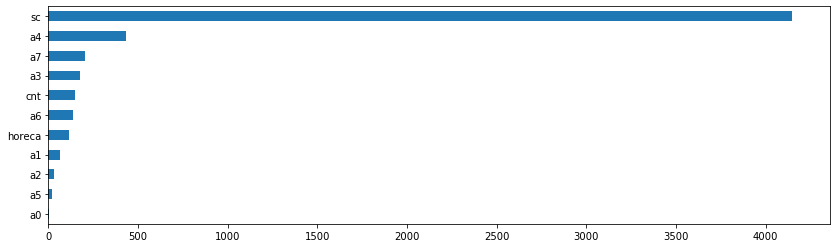

In [207]:
clientes["categoria"].value_counts(ascending=True).plot(kind="barh");

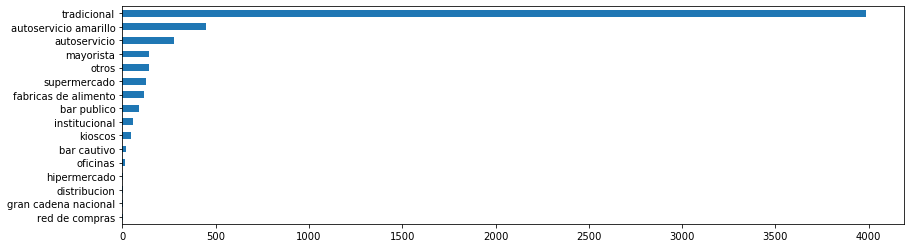

In [208]:
clientes["tipo negocio"].value_counts(ascending=True).plot(kind="barh");

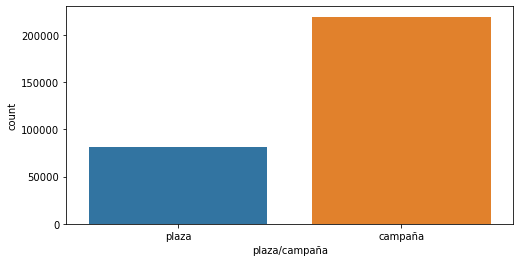

In [102]:
f = plt.figure(figsize=(8,4))
sns.countplot(x="plaza/campaña", data=data)

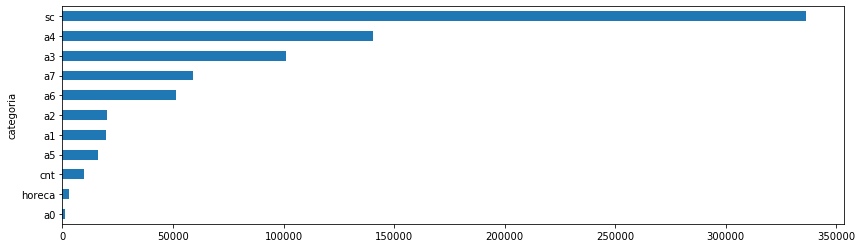

In [205]:
data.groupby("categoria")["u pedidas"].sum().sort_values(ascending=True).plot(kind="barh");

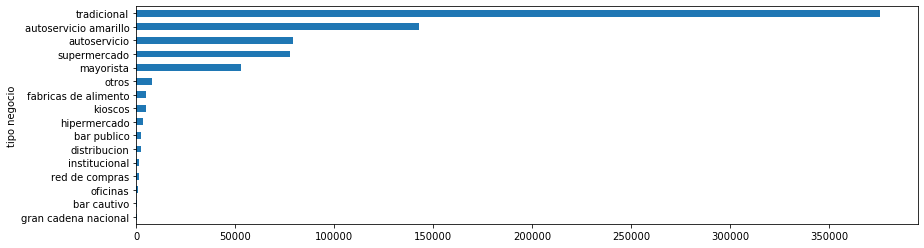

In [206]:
data.groupby("tipo negocio")["u pedidas"].sum().sort_values(ascending=True).plot(kind="barh");

In [262]:
u_por_cliente = data.groupby("cliente")["u pedidas"].sum().sort_values(ascending=False).reset_index()

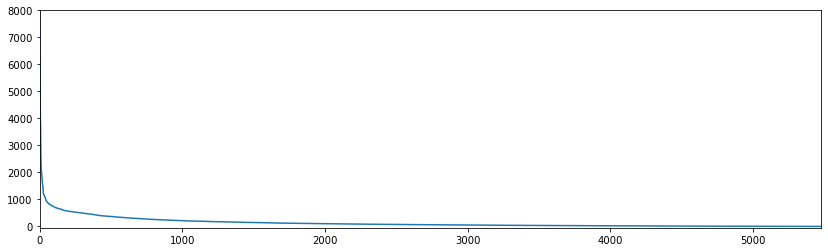

In [269]:
u_por_cliente["u pedidas"].plot(kind="line", ylim=(-50,8000))

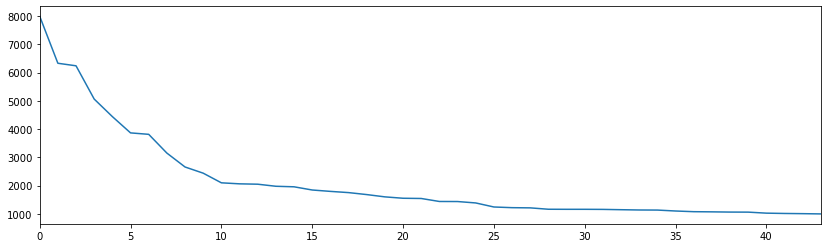

In [277]:
u_por_cliente.loc[u_por_cliente["u pedidas"] >= 1000, "u pedidas"].plot(kind="line");

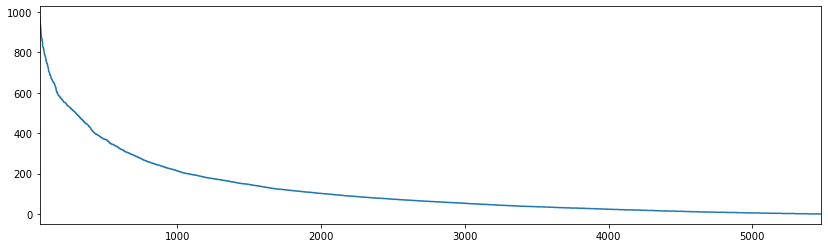

In [266]:
u_por_cliente.loc[u_por_cliente["u pedidas"] < 1000, "u pedidas"].plot(kind="line");

In [275]:
u_por_cliente["u pedidas"].describe()

count    5478.000000
mean      138.509493
std       277.090571
min         1.000000
25%        22.000000
50%        63.000000
75%       161.000000
max      7992.000000
Name: u pedidas, dtype: float64

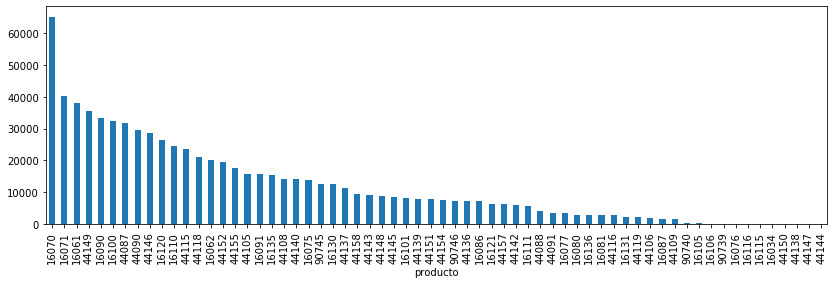

In [291]:
data.groupby("producto")["u pedidas"].sum().sort_values(ascending=False).plot(kind="bar");

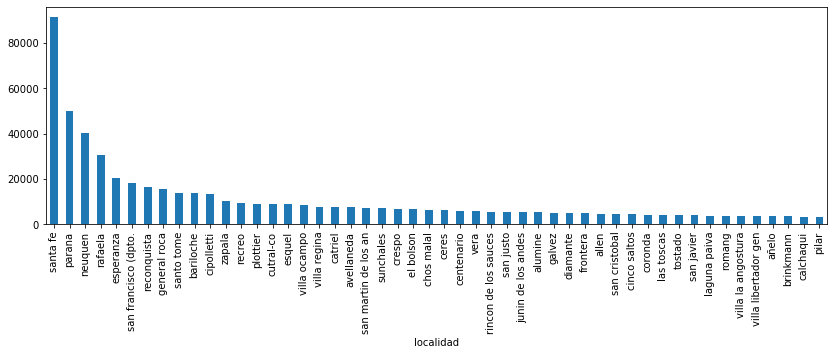

In [318]:
data.groupby("localidad")["u pedidas"].sum().sort_values(ascending=False).head(50).plot(kind="bar");

In [326]:
data = data.set_index("tiempo").sort_index()

KeyError: "None of ['tiempo'] are in the columns"

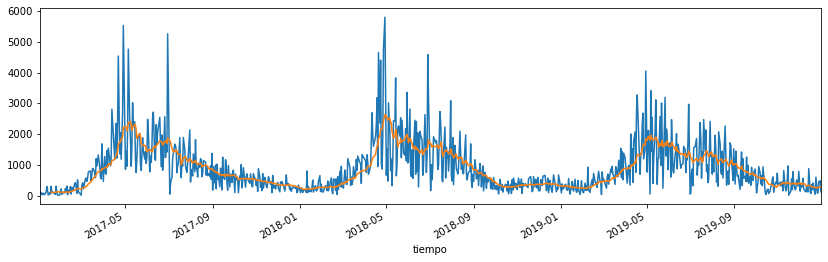

In [364]:
data.groupby("tiempo")["u pedidas"].sum().plot()
data.groupby("tiempo")["u pedidas"].sum().rolling(window=15).mean().plot()

In [399]:
series_por_producto = data.groupby(["tiempo", "producto"])["u pedidas"].sum().unstack().fillna(0)
tendencias_por_producto = series_por_producto.rolling(window=7).mean()

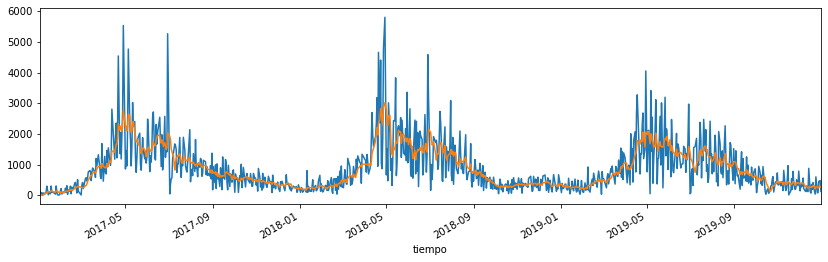

In [400]:
series_por_producto.sum(axis=1).plot()
tendencias_por_producto.sum(axis=1).plot();

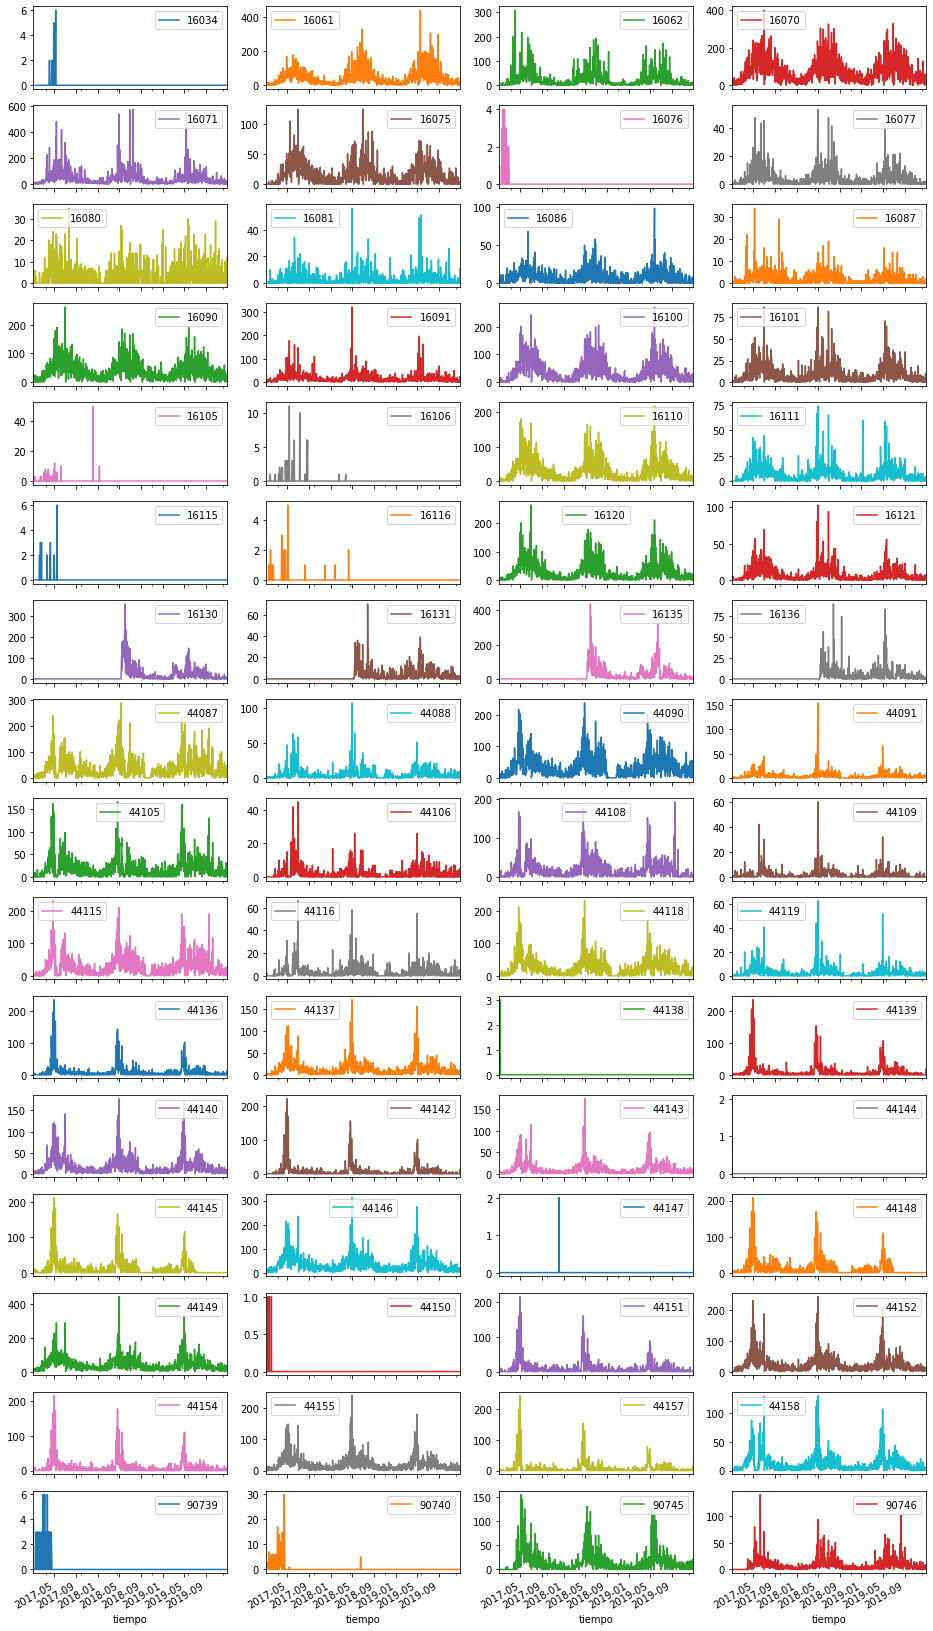

In [379]:
series_por_producto.plot(subplots=True, layout=(16,4), figsize=(16,32));

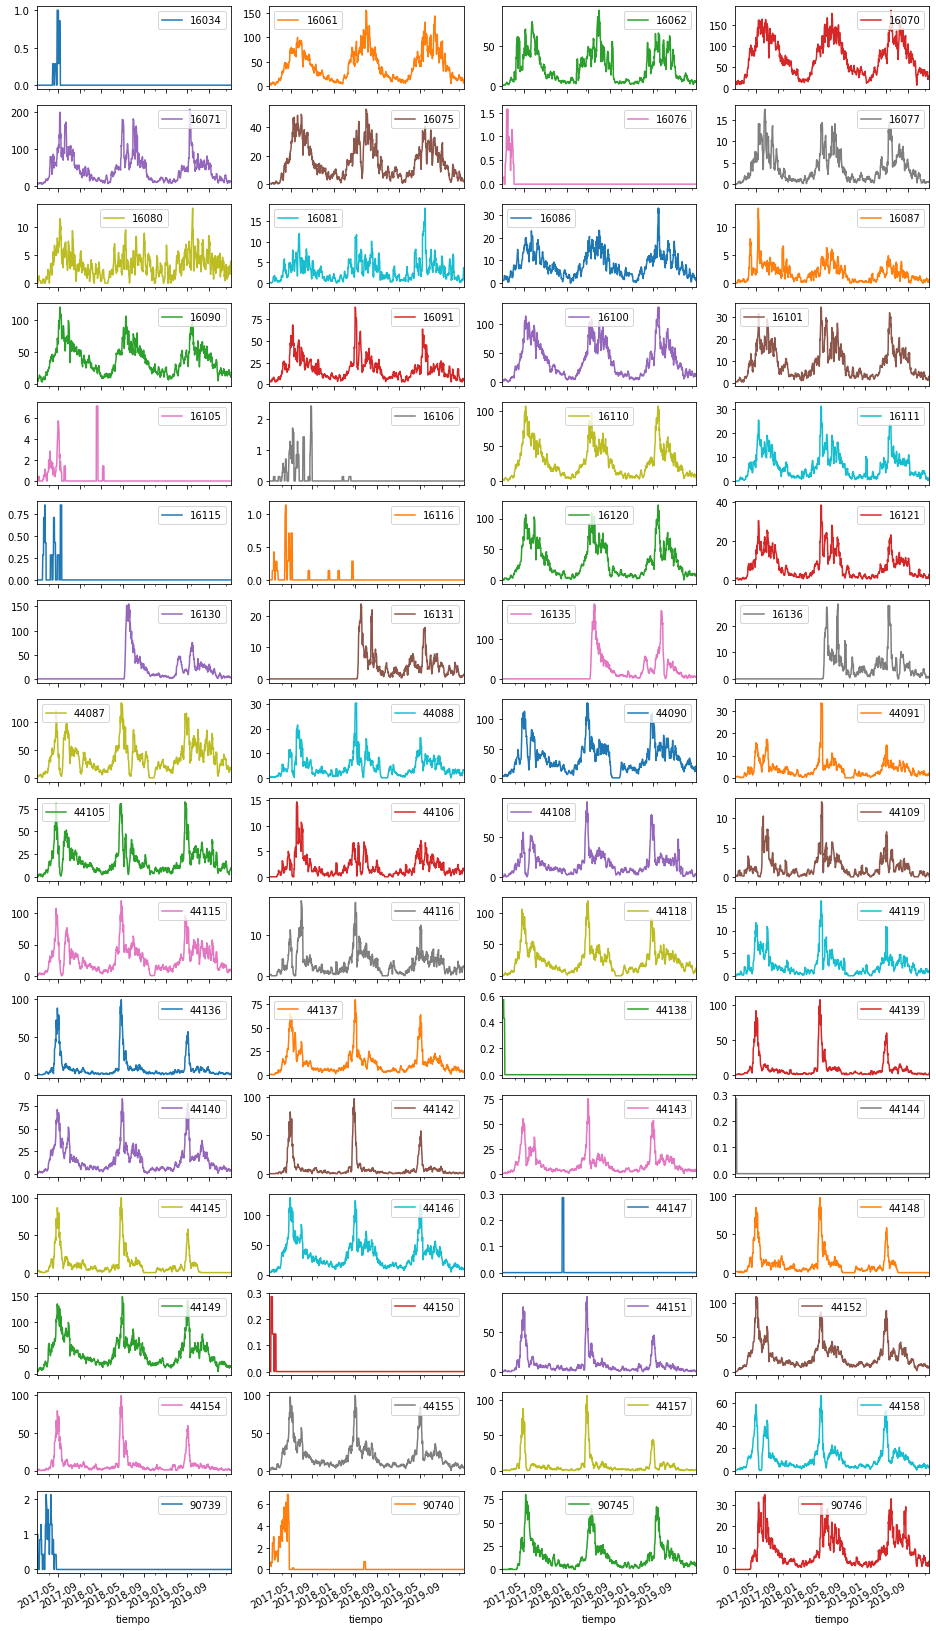

In [401]:
tendencias_por_producto.plot(subplots=True, layout=(16,4), figsize=(16,32));

In [385]:
series_por_categoria = data.groupby(["tiempo", "categoria"])["u pedidas"].sum().unstack().fillna(0)
tendencias_por_categoria = series_por_categoria.rolling(window=15).mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99a4d92860>,
      dtype=object)

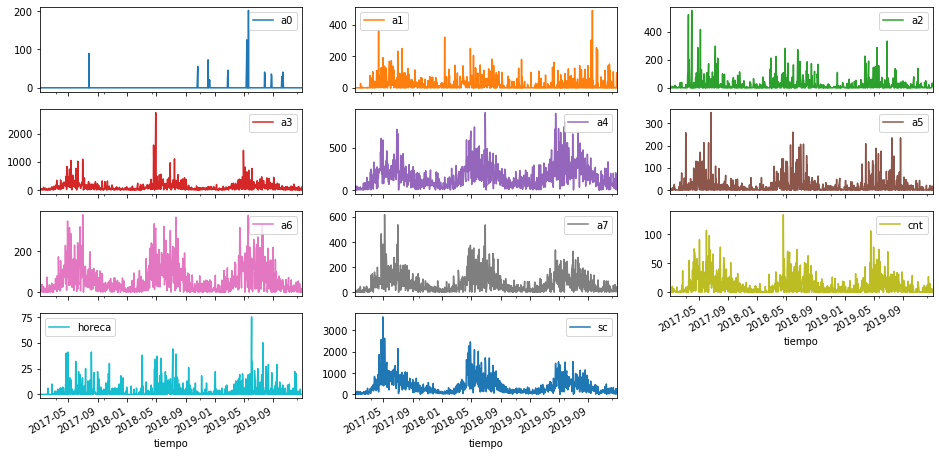

In [384]:
series_por_categoria.plot(subplots=True, layout=(4,3), figsize=(16,8));

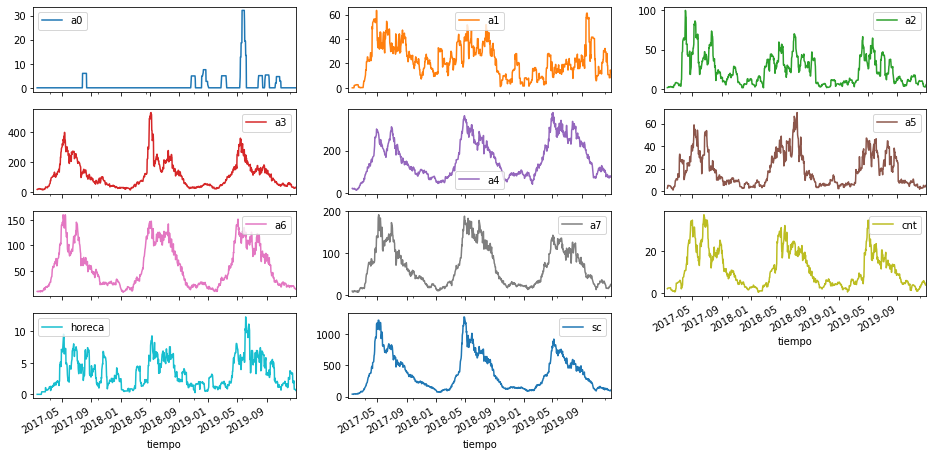

In [386]:
tendencias_por_categoria.plot(subplots=True, layout=(4,3), figsize=(16,8));

In [397]:
series_por_negocio = data.groupby(["tiempo", "tipo negocio"])["u pedidas"].sum().unstack().fillna(0)
tendencias_por_negocio = series_por_negocio.rolling(window=15).mean()

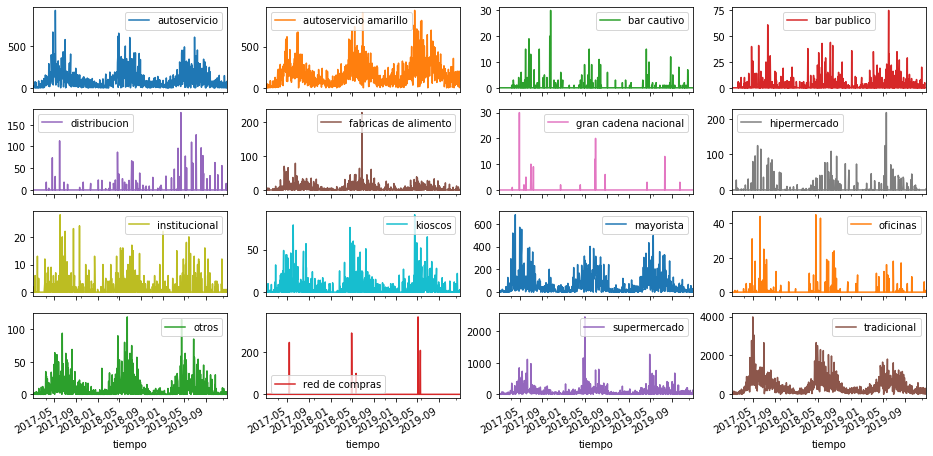

In [395]:
series_por_negocio.plot(subplots=True, layout=(4,4), figsize=(16,8));

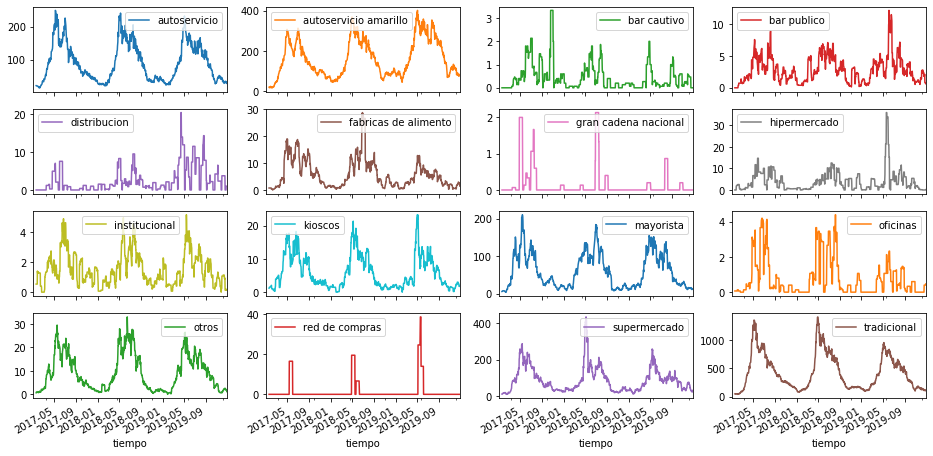

In [398]:
tendencias_por_negocio.plot(subplots=True, layout=(4,4), figsize=(16,8));